In [22]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from data_normalizer import unscale_data_with_minmax
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib

In [23]:
# uncomment to train model locally
# import subprocess
# subprocess.run("python train_model.py", shell=True)

In [24]:
filtered_data = np.load('./macroeconomic_data/filtered_data.npy', allow_pickle=True).item()

data = []
for date, data_frame in filtered_data.items():
    flattened_data = pd.json_normalize(data_frame, sep=".")
    flattened_data["10"] = str(date[1])
    data.append(flattened_data)
data = pd.concat(data, ignore_index=True)

X = data
X = X.iloc[:-1, :]
y = data.filter(regex='0.36', axis=1)
y = y.iloc[1:]
y = y.values.ravel()

best_estimator = joblib.load('./joblib/best_estimator.joblib')
print(best_estimator)
random_state = np.random.RandomState()
random_state.set_state(joblib.load('./joblib/split_random_state.joblib'))
print(random_state)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

MLPRegressor(activation='tanh', alpha=5e-05,
             hidden_layer_sizes=(200, 200, 200, 200), learning_rate='adaptive',
             max_iter=100000, momentum=0.85, solver='sgd', tol=1e-06)
RandomState(MT19937)


In [25]:
y_pred = best_estimator.predict(X_test)
y_pred_scaled = unscale_data_with_minmax(np.array(y_pred))
y_test_scaled = unscale_data_with_minmax(np.array(y_test))

print("Predicted\t\tActual")
for pred, actual in zip(y_pred_scaled, y_test_scaled):
    print(f"{pred}\t\t{actual}")

Predicted		Actual
99.84865099316302		100.1
99.84160083419525		100.2
100.16506740417118		100.0
100.83431803663237		100.4
100.5813909544246		101.1
101.80546745153119		101.7
100.44694055107773		100.9
100.01089654865854		100.0
100.70893275360326		100.5
100.1021723326769		100.2
100.12210293343905		100.1
100.00575468515058		100.2
100.11945620823214		100.1
100.24193272955776		100.7
99.89402190253307		99.9
100.33480952188695		100.1
100.2330764487515		100.3
100.38178342551676		100.2
99.86600431790798		100.0
101.1682499797028		101.6
100.15166002344138		100.0
100.88877673671401		100.8
99.89738723991		99.8
100.14447066445942		99.9
99.99227951064249		100.7
99.92168383319375		100.0
100.30863471360476		100.4
100.59714966186965		100.7
100.48030802938621		100.1
100.2975012091654		100.4
100.21165204259638		100.2
100.19089682515309		100.1
100.86217510631998		100.7
100.20539146303521		100.4
99.93488129908751		100.0
100.90753259353738		101.8
99.9133265616246		99.7
100.84770546142553		100.3
99.5208048268631

In [26]:
mse = mean_squared_error(y_test_scaled, y_pred_scaled)
r2 = r2_score(y_test_scaled, y_pred_scaled)
print('Mean Squared Error:', mse)
print('R-squared Score:', r2)

Mean Squared Error: 0.09035336934500528
R-squared Score: 0.6424139394937729


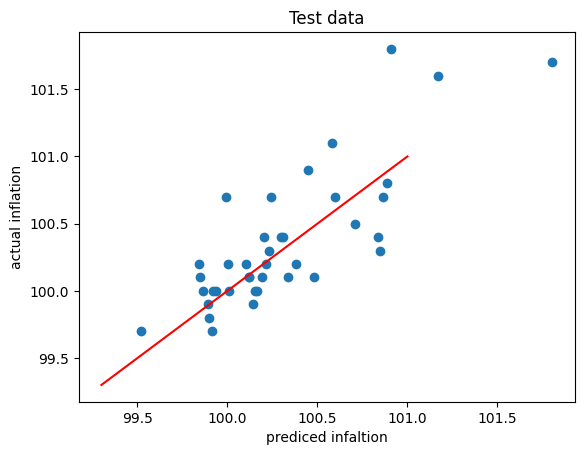

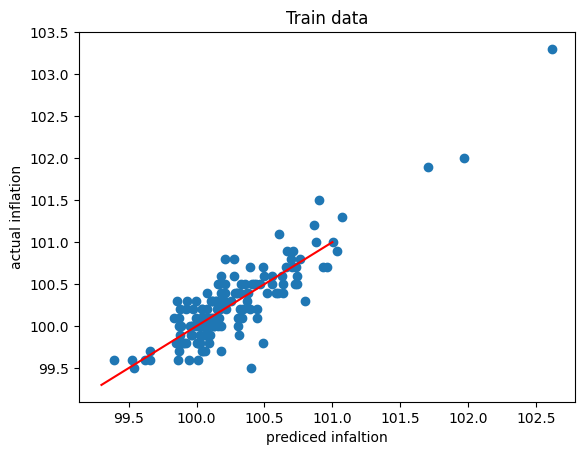

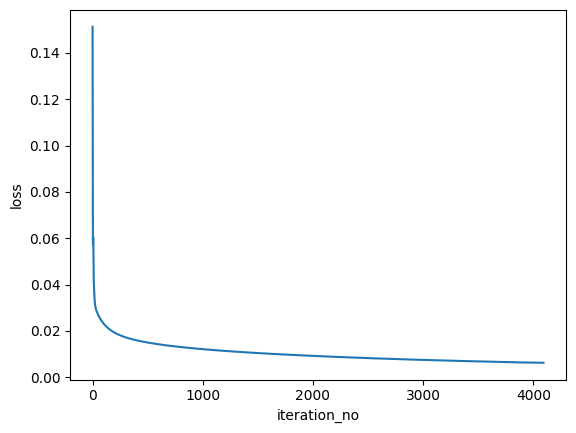

In [27]:
plt.scatter(y_pred_scaled, y_test_scaled)
plt.plot([99.3, 101], [99.3, 101], c='r')
plt.xlabel('prediced infaltion')
plt.ylabel('actual inflation')
plt.title("Test data")
plt.show()

y_train_scaled = unscale_data_with_minmax(y_train)
y_train_pred = unscale_data_with_minmax(best_estimator.predict(X_train))

plt.plot([99.3, 101], [99.3, 101], c='r')
plt.scatter(y_train_pred, y_train_scaled)
plt.xlabel('prediced infaltion')
plt.ylabel('actual inflation')
plt.title("Train data")
plt.show()

plt.figure()
plt.plot(best_estimator.loss_curve_)
plt.xlabel("iteration_no")
plt.ylabel("loss")
plt.show()

In [28]:
filtered_data_recent = np.load('./macroeconomic_data/filtered_data_recent.npy', allow_pickle=True).item()
normalized_data_recent = np.load('./macroeconomic_data/normalized_data_recent.npy', allow_pickle=True).item()

data_recent = []
for date, data_frame in filtered_data_recent.items():
    flattened_data = pd.json_normalize(data_frame, sep=".")
    flattened_data["10"] = str(date[1])
    data_recent.append(flattened_data)

data_recent = pd.concat(data_recent, ignore_index=True)
X_recent = data_recent

y_recent = []
for date, data_frame in normalized_data_recent.items():
    if 0 in data_frame:
        if 36 in data_frame[0]:
            if data_frame[0][36] is not None:
                y_recent.append(data_frame[0][36])

if len(y_recent) > len(X_recent):
    y_recent = y_recent[1:len(X_recent) + 1]
else:
    X_recent = X_recent.iloc[:-1, :]

    y_recent = data_recent.filter(regex='0.36', axis=1)
    y_recent = y_recent.iloc[1:]
    y_recent = y_recent.values.ravel()


y_recent_pred = best_estimator.predict(X_recent)

y_recent_scaled = unscale_data_with_minmax(np.array(y_recent))
y_recent_pred_scaled = unscale_data_with_minmax(y_recent_pred)

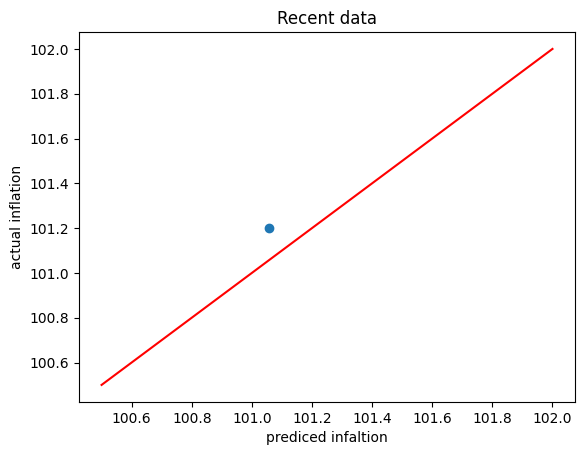

In [29]:
plt.scatter(y_recent_pred_scaled, y_recent_scaled)
plt.plot([100.5, 102], [100.5, 102], c='r')
plt.xlabel('prediced infaltion')
plt.ylabel('actual inflation')
plt.title("Recent data")
plt.show()